# 2) Salary_hike -> Build a prediction model for Salary_hike


### 1. Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn import linear_model

### 2. Importing data

In [2]:
sal_data=pd.read_csv("Salary_Data.csv")
sal_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### 3. Initial analysis

In [3]:
sal_data.shape

(30, 2)

In [4]:
sal_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
sal_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

## 4. Feature Engineering| Data Preparation

#### Checking for outliers

In [6]:
######Using Z-Score
outliers=[]
def detect_outliers(data):
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [7]:
outlier_pt=detect_outliers(sal_data['YearsExperience'])
outlier_pt

[]

In [8]:
## using iqr
sorted(sal_data['YearsExperience'])
quantile1, quantile3= np.percentile(sal_data['YearsExperience'],[25,75])
iqr_value=quantile3-quantile1
print(iqr_value)

4.500000000000001


In [9]:
lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 
print(lower_bound_val,upper_bound_val)

-3.5500000000000016 14.450000000000003


In [10]:
for i in sal_data['YearsExperience']:
    if i<lower_bound_val:
        sal_data['YearsExperience'].remove(i)
    if i>upper_bound_val:
        sal_data['YearsExperience'].remove(i)
print(sal_data['YearsExperience'])

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64


### ----------- Assumption---------

#### 1. Check for linearity: using scatter plot or pairplot


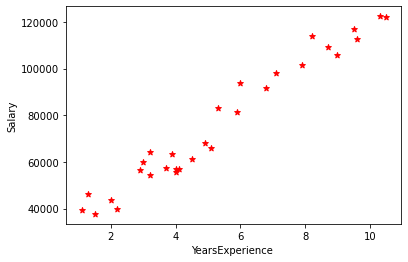

In [11]:
%matplotlib inline
plt.xlabel('YearsExperience ')
plt.ylabel('Salary')
plt.scatter(sal_data.YearsExperience,sal_data.Salary,color='red',marker='*')
plt.show()

#### 2.No Auto Regression:
#### Output does not vary wrt time,so auto regression is satisfied¶

#### 3. No Multicolinearity




In [12]:
sal_data_corr=sal_data.corr()
sal_data_corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


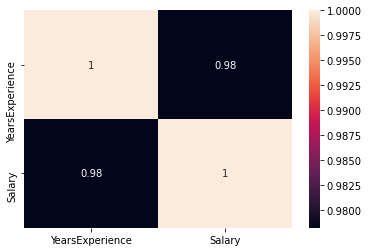

In [13]:
sns.heatmap(data = sal_data_corr,annot=True)
plt.show() 

## 4. Model Building

In [14]:
from sklearn import linear_model
X=sal_data.drop('Salary',axis='columns')
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [15]:
y=sal_data.Salary
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [16]:
reg=linear_model.LinearRegression()# initialization
model=reg.fit(X,y)# traing data
model


LinearRegression()

## 5. Model Testing

In [17]:
c=reg.intercept_ # intercept value
c

25792.20019866871

In [18]:
m=reg.coef_ # slope value
m

array([9449.96232146])

In [19]:
test_1 =(m*15)+c
test_1
#### manual testing

array([167541.63502049])

In [20]:
test_1 =(m*18)+c
test_1

array([195891.52198486])

#### Testing Using Linear Model

In [21]:
reg.predict([[18]])

array([195891.52198486])

In [22]:
reg.predict([[15]])

array([167541.63502049])

##### ------------ Best Fit Line---------------

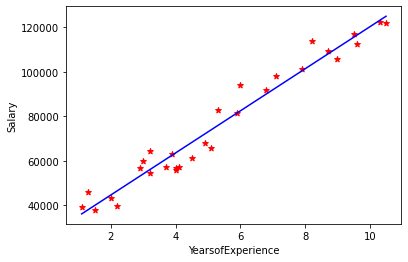

In [23]:
%matplotlib inline
plt.xlabel('YearsofExperience')
plt.ylabel('Salary')
plt.scatter(X,y,color='red',marker='*')
plt.plot(X,reg.predict(X),color='blue')
plt.show()

In [24]:
y_pred=reg.predict(X)
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9569566641435086

In [25]:
error=np.abs(y-y_pred)

#### Residual Analysis

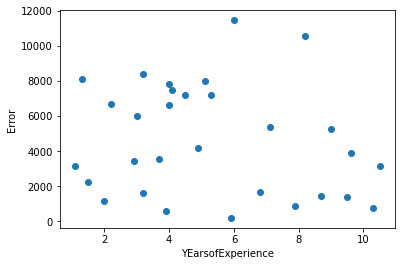

In [26]:
plt.scatter(x =X,y =error)
plt.xlabel('YEarsofExperience')
plt.ylabel('Error')
plt.show()

## 6. Model Deployment

In [28]:
from pickle import dump
dump(model,open('L_R_sal_data.pkl','wb'))

In [31]:
from pickle import load
test_model=load(open('L_R_sal_data.pkl','rb'))

In [32]:
test_model.predict([[30]])

array([309291.06984232])